# This script tests the correlation coefficient among channels using the speech-Dutch SEEG dataset. It shows that there is strong correlation among neighboring channels.


In [1]:
from pre_all import computer
import os
import numpy as np
from pynwb import NWBHDF5IO
import mne
import pandas as pd

2024-06-17 13:13:36 - Start Program

pre_all: Running from CMD.
common_dl.py: Using CUDA.


In [6]:
import mne

In [2]:
sid=1
use_channels=False

In [3]:
    
if computer == 'mac':
    path_bids = r'/Volumes/Samsung_T5/data/SingleWordProductionDutch'
    path_output = r'/Volumes/Samsung_T5/data/SingleWordProductionDutch/features'
elif computer == 'workstation':
    path_bids = r'H:\Long\data\SingleWordProductionDutch-iBIDS'
    path_output = r'H:\Long\data\SingleWordProductionDutch-iBIDS\features'
elif computer == 'Yoga':
    path_bids = r'D:\data\BaiduSyncdisk\SingleWordProductionDutch'
elif computer == 'google':
    path_bids = r'/content/drive/MyDrive/data/SingleWordProductionDutch'
    path_output = '/content/drive/MyDrive/data/SingleWordProductionDutch/features'
# participants = pd.read_csv(os.path.join(path_bids,'participants.tsv'), delimiter='\t')
# for p_id, participant in enumerate(participants['participant_id']):

# Load data
participant = 'sub-' + f"{sid:02d}"
filename = os.path.join(path_bids, participant, 'ieeg', f'{participant}_task-wordProduction_ieeg.nwb')
print('Loading ' + filename + '.')
io = NWBHDF5IO(filename, 'r')
nwbfile = io.read()
# sEEG
eeg = nwbfile.acquisition['iEEG'].data[:]  # (307523, 127)
if use_channels:
    eeg=eeg[:,use_channels]
eeg_sr = 1024
# audio
audio = nwbfile.acquisition['Audio'].data[:]  # (14414532,)
audio_sr = 48000
#target_SR = 16000
# words (markers)
words = nwbfile.acquisition['Stimulus'].data[:]
words = np.array(words, dtype=str)  # (307511,)
io.close()

In [7]:
ch_number=eeg.shape[1]
ch_types = ['eeg' for i in range(ch_number)]
ch_names = [str(i) for i in range(ch_number)]
info = mne.create_info(ch_names=ch_names, sfreq=1024, ch_types=ch_types)

In [18]:
ch_number

127

In [34]:
raw = mne.io.RawArray(eeg.transpose(), info)
raw.filter(l_freq=3,h_freq=9,picks=['all'])

Measurement date,Unknown
Experimenter,Unknown
Participant,Unknown
Digitized points,Not available
Good channels,127 EEG
Bad channels,None
EOG channels,Not available
ECG channels,Not available
Sampling frequency,1024.00 Hz
Highpass,3.00 Hz
Lowpass,9.00 Hz


In [35]:
event_id=1
duration=1
events = mne.make_fixed_length_events(raw, event_id, duration=duration)
epoch = mne.Epochs(raw, events=events, event_id=event_id, tmin=0,tmax=1, baseline=None, verbose=True)

In [36]:
matrixes=[]
data=epoch.get_data(picks=['all'],tmin=0,tmax=1)
ch_number=data.shape[1]
for trial in data: # trial: (115, 1000)
    dataframe=pd.DataFrame(data=trial.transpose(),columns=[str(i) for i in range(ch_number)])
    matrix = dataframe.corr(method='pearson')
    matrixes.append(matrix)
matrix_avg=np.average(np.asarray(matrixes),axis=0)

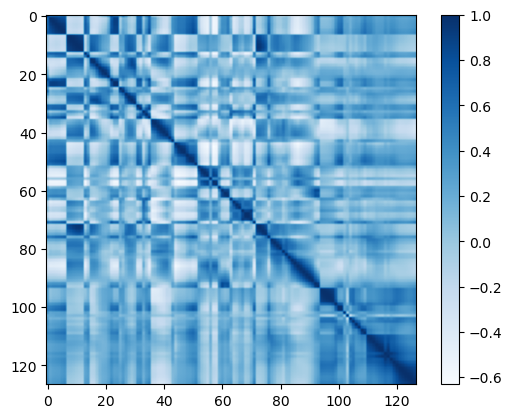

In [37]:
from matplotlib import pyplot as plt
%matplotlib inline
#%matplotlib qt
#%gui qt
plt.imshow(matrix_avg, cmap='Blues')
plt.colorbar()
#variables=ele['sid2']['ana_label_id']
#plt.xticks(range(len(matrix)), variables, rotation=90, ha='right')
#plt.yticks(range(len(matrix)), variables)
plt.show()